# **CC25-CF168 - Diagnosys - HEARTRISK**

## **Data Understanding**

**Deskripsi Dataset: Prediksi Risiko Penyakit Jantung**

Dataset yang digunakan dalam proyek ini adalah **[Heart Disease Risk Prediction Dataset](https://www.kaggle.com/datasets/mahatiratusher/heart-disease-risk-prediction-dataset)**.

---

**Sumber dan Konteks:**

Dataset ini disusun dari berbagai sumber medis dan bertujuan untuk memprediksi risiko penyakit jantung koroner berdasarkan sejumlah faktor risiko. Dataset ini berisi 15 fitur demografis, perilaku, dan medis yang merupakan faktor risiko potensial untuk penyakit jantung koroner.

---

**Variabel Target dan Keseimbangan Kelas**

Variabel target yang akan diprediksi adalah **`Heart_Risk`**. Kolom ini merupakan variabel biner yang bernilai:
* **0**: Individu dengan risiko penyakit jantung rendah.
* **1**: Individu dengan risiko penyakit jantung tinggi.

Dataset ini bersifat **seimbang**, yang memungkinkan model machine learning untuk dilatih tanpa kekhawatiran terhadap bias akibat ketidakseimbangan kelas.

---
**Deskripsi Fitur**

| Variabel | Deskripsi | Nilai |
| :--- | :--- | :--- |
|**Heart_Risk**| Fitur Target | 0 = Tidak, 1 = Ya
| **Chest\_Pain** | Apakah pasien mengalami nyeri dada | 0 = Tidak, 1 = Ya |
| **Shortness\_of\_Breath**| Apakah pasien mengalami sesak napas | 0 = Tidak, 1 = Ya |
| **Fatigue** | Apakah pasien mengalami kelelahan yang tidak biasa | 0 = Tidak, 1 = Ya |
| **Palpitations** | Apakah pasien mengalami detak jantung tidak teratur (palpitasi) | 0 = Tidak, 1 = Ya |
| **Dizziness** | Apakah pasien mengalami pusing atau sensasi akan pingsan | 0 = Tidak, 1 = Ya |
| **Swelling** | Apakah pasien mengalami pembengkakan pada kaki atau pergelangan | 0 = Tidak, 1 = Ya |
| **Pain\_Arms\_Jaw\_Back**| Nyeri yang menyebar ke lengan, rahang, atau punggung | 0 = Tidak, 1 = Ya |
| **Cold\_Sweats\_Nausea**| Apakah pasien mengalami keringat dingin dan mual | 0 = Tidak, 1 = Ya |
| **High\_BP** | Riwayat atau diagnosis tekanan darah tinggi (Hipertensi) | 0 = Tidak, 1 = Ya |
| **High\_Cholesterol** | Riwayat atau diagnosis kolesterol tinggi | 0 = Tidak, 1 = Ya |
| **Diabetes** | Riwayat atau diagnosis diabetes | 0 = Tidak, 1 = Ya |
| **Smoking** | Apakah pasien memiliki riwayat merokok | 0 = Tidak, 1 = Ya |
| **Obesity** | Apakah pasien mengalami obesitas | 0 = Tidak, 1 = Ya |
| **Sedentary\_Lifestyle** | Menjalani gaya hidup kurang gerak atau tidak aktif secara fisik | 0 = Tidak, 1 = Ya |
| **Family\_History** | Riwayat penyakit jantung dalam keluarga | 0 = Tidak, 1 = Ya |
| **Chronic\_Stress** | Apakah pasien mengalami stres kronis dalam kehidupan sehari-hari | 0 = Tidak, 1 = Ya |
| **Gender** | Jenis kelamin pasien | 0 = Perempuan, 1 = Laki-laki |
| **Age** | Usia pasien dalam tahun | Nilai numerik (Tahun) |

## Import Library

In [ ]:
# Manipulasi Data dan Operasi Numerik
import pandas as pd
import numpy as np

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Operasi File dan Sistem
import os
from google.colab import files
import shutil

# Persiapan Data dan Selekesi Fitur
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve

# Penanganan Data Tidak Seimbang
from imblearn.pipeline import Pipeline

# Model Machine Learning Klasik
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Deep Learning (TensorFlow & Keras)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense,
    BatchNormalization,
    Normalization,
    Input,
    concatenate,
    Lambda,
    Dropout,
    Layer
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Evaluasi Model
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    roc_auc_score,
    precision_recall_curve,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

**INSIGHT**

---

**1. Manipulasi Data dan Operasi Numerik**
* **pandas (`pd`)**: Library utama untuk bekerja dengan data tabular (seperti tabel atau spreadsheet). Digunakan untuk membaca file (misalnya CSV), membersihkan data, mengubah, dan menganalisis struktur data dalam format yang disebut **DataFrame**.
* **numpy (`np`)**: Fondasi untuk komputasi numerik di Python. Digunakan untuk bekerja dengan array (vektor, matriks) secara efisien, yang merupakan dasar dari banyak operasi machine learning.

**2. Visualisasi Data**
* **matplotlib.pyplot (`plt`)**: Library dasar untuk membuat berbagai jenis plot dan grafik statis, seperti grafik garis, bar, dan histogram.
* **seaborn (`sns`)**: Dibangun di atas matplotlib, library ini memudahkan pembuatan visualisasi statistik yang lebih menarik dan informatif (contoh: heatmap, boxplot, violinplot).

**3. Operasi File dan Sistem**
* **os & shutil**: Digunakan untuk berinteraksi dengan sistem operasi, seperti mengelola direktori, memindahkan file (`shutil`), dan menangani path file.
* **google.colab files**: Modul khusus untuk Google Colab yang memungkinkan Anda mengunggah dan mengunduh file dari lingkungan Colab.

**4. Preprocessing dan Seleksi Fitur**
* **sklearn.preprocessing (`StandardScaler`, `MinMaxScaler`)**: Berisi alat untuk mengubah skala fitur. **`StandardScaler`** mengubah fitur agar memiliki rata-rata 0 dan standar deviasi 1, sementara **`MinMaxScaler`** mengubah fitur ke rentang tertentu (biasanya 0 hingga 1).
* **sklearn.feature_selection (`RFE`, `SelectKBest`, `f_classif`)**: Menyediakan metode untuk memilih fitur yang paling relevan atau penting dari dataset Anda untuk meningkatkan performa model dan mengurangi kompleksitas.

**5. Pembagian Data dan Pemodelan**
* **sklearn.model_selection (`train_test_split`, `learning_curve`)**: Digunakan untuk membagi dataset menjadi data latih dan data uji, serta untuk menganalisis kurva belajar model.
* **sklearn.linear_model (`LogisticRegression`)**: Implementasi model Regresi Logistik, model linear klasik yang sering digunakan sebagai baseline untuk masalah klasifikasi.
* **sklearn.ensemble (`RandomForestClassifier`)**: Implementasi model Random Forest, sebuah model *ensemble* yang kuat dan seringkali berkinerja tinggi untuk klasifikasi dengan menggabungkan banyak *decision tree*.

**6. Evaluasi Model**
* **sklearn.metrics**: Kumpulan lengkap fungsi untuk mengukur performa model.
    * **Untuk Klasifikasi**: `classification_report`, `confusion_matrix`, `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `roc_auc_score`.
    * **Visualisasi Kinerja**: `ConfusionMatrixDisplay`, `roc_curve`, `precision_recall_curve`.
    * **Untuk Regresi**: `mean_squared_error`.

**7. Pipeline dan Penanganan Data Tidak Seimbang**
* **imblearn.pipeline (`Pipeline`)**: Versi *pipeline* dari library `imbalanced-learn` yang memungkinkan Anda untuk menggabungkan langkah-langkah *resampling* (untuk data tidak seimbang) dengan langkah-langkah pemrosesan lainnya secara berurutan dan terstruktur.

**8. Deep Learning dengan TensorFlow/Keras**
* **tensorflow (`tf`)**: Platform *end-to-end* untuk membangun dan melatih model machine learning, terutama jaringan saraf tiruan (*deep learning*).
* **tensorflow.keras**: API tingkat tinggi di dalam TensorFlow yang membuat pembangunan model menjadi lebih mudah dan intuitif.
    * **Layers**: Blok bangunan dasar dari jaringan saraf (contoh: `Dense` untuk layer yang terhubung penuh, `BatchNormalization`, `Dropout` untuk regularisasi, `Input` untuk mendefinisikan input).
    * **Model**: Kerangka untuk menggabungkan *layers* menjadi sebuah model yang dapat dilatih.
    * **Optimizers (`Adam`)**: Algoritma yang digunakan untuk memperbarui bobot model selama proses training untuk meminimalkan *loss*.
    * **Callbacks (`EarlyStopping`)**: Fungsi yang dapat dipanggil selama training untuk melakukan tindakan tertentu, seperti menghentikan training lebih awal jika tidak ada peningkatan performa.

## Load Dataset

In [ ]:
# Upload kaggle.json
files.upload()

In [ ]:
# Setup Kaggle API key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d mahatiratusher/heart-disease-risk-prediction-dataset

# Unzip file
!unzip -q heart-disease-risk-prediction-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/mahatiratusher/heart-disease-risk-prediction-dataset
License(s): CC-BY-SA-4.0
  0% 0.00/1.38M [00:00<?, ?B/s]
100% 1.38M/1.38M [00:00<00:00, 910MB/s]


In [ ]:
# Baca file CSV
df = pd.read_csv("/content/heart_disease_risk_dataset_earlymed.csv")

# Testing
df

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,30.0,0.0
69996,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,56.0,1.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,53.0,0.0
69998,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,57.0,1.0


**INSIGHT**


---



Kode ini melakukan otentikasi sesi Colab menggunakan kunci API Kaggle. Setelah itu, dataset diunduh, diekstrak, dan file CSV yang relevan langsung dimuat ke dalam DataFrame pandas bernama `df`.

## Exploratory Data Analysis (EDA)

### Identifying Invalid Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress       70000 non-null 

### Identifying Missing Values

In [ ]:
df.isna().sum()

,0
Chest_Pain,0
Shortness_of_Breath,0
Fatigue,0
Palpitations,0
Dizziness,0
Swelling,0
Pain_Arms_Jaw_Back,0
Cold_Sweats_Nausea,0
High_BP,0
High_Cholesterol,0


### Identifying Duplicate Data

In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  6245


### Identifying Inaccurate Values

In [ ]:
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499229,0.500586,0.498571,0.498729,0.501414,0.498929,0.501500,0.502457,0.497429,0.499214,0.500643,0.502971,0.499157,0.503543,0.497629,0.499957,0.548929,54.461986,0.500000
std,0.500003,0.500003,0.500002,0.500002,0.500002,0.500002,0.500001,0.499998,0.499997,0.500003,0.500003,0.499995,0.500003,0.499991,0.499998,0.500004,0.497604,16.410794,0.500004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


### Identifying Outlier

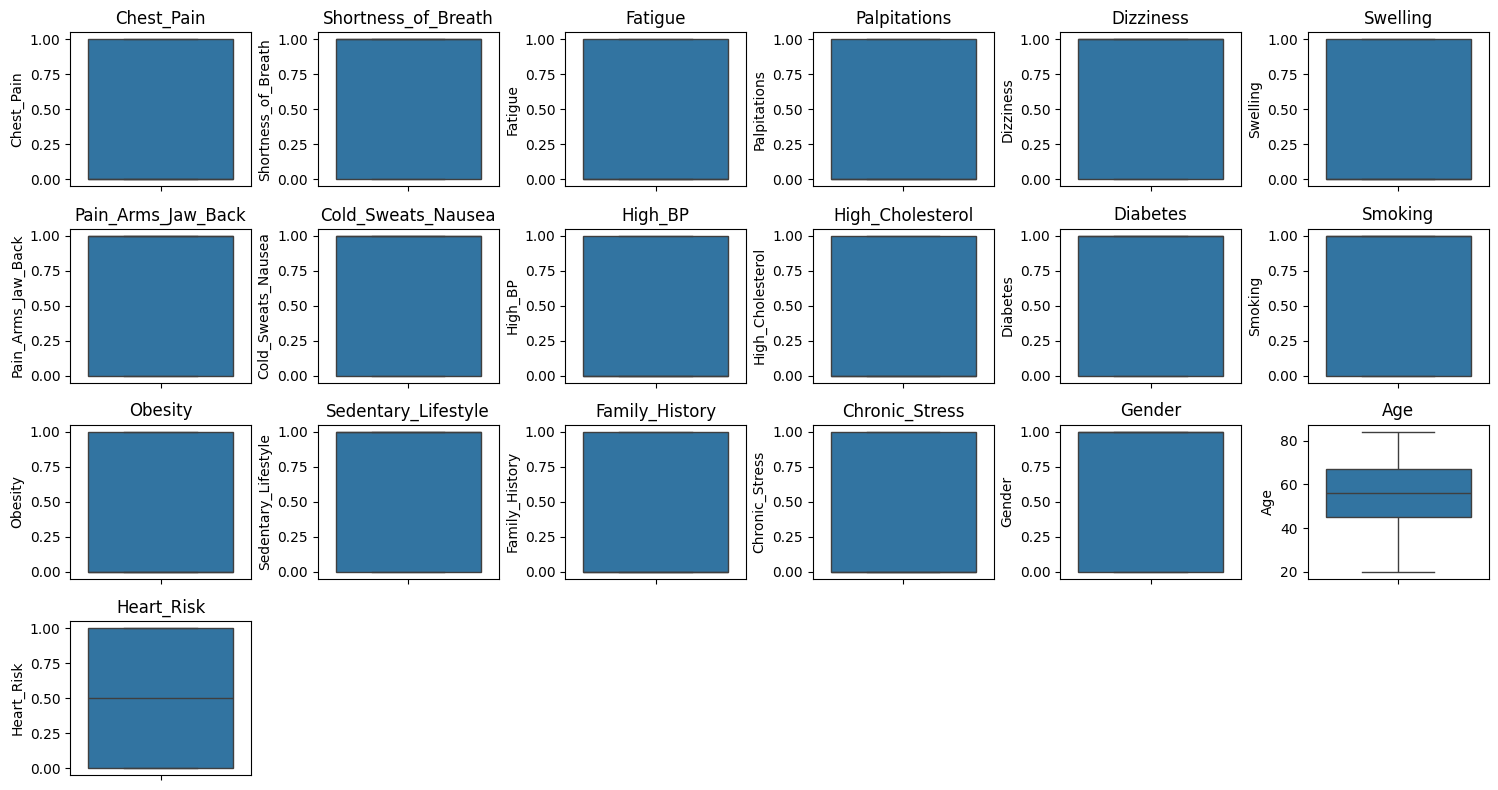

In [ ]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(df, 1):
    plt.subplot(4, 6, i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

### Identifying Data Distribution of Feature

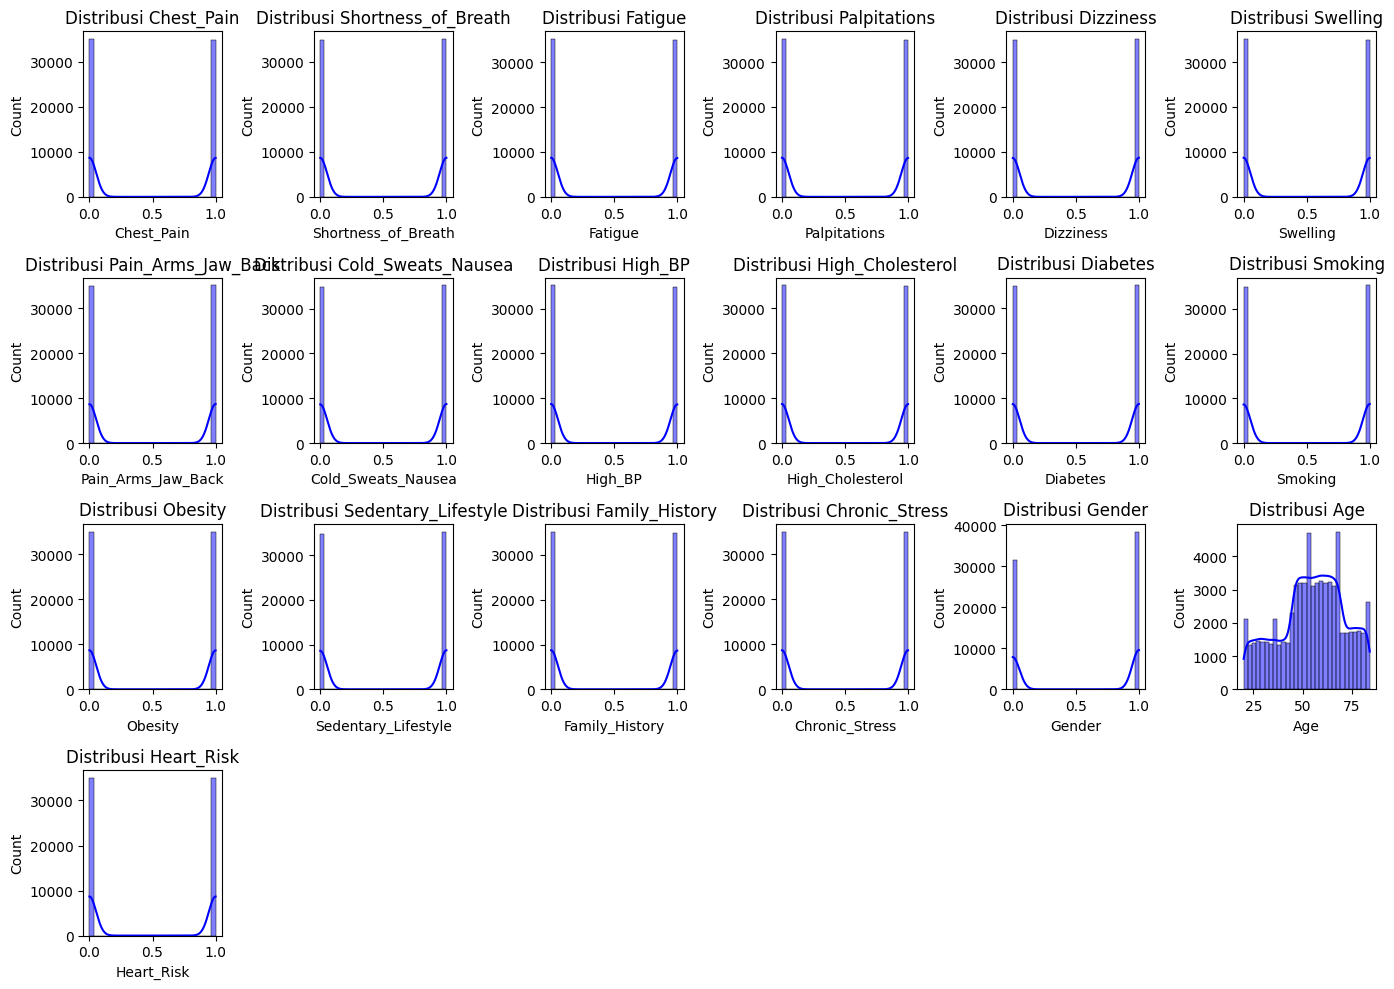

In [ ]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 6, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

### Identifying Target Data Distribution

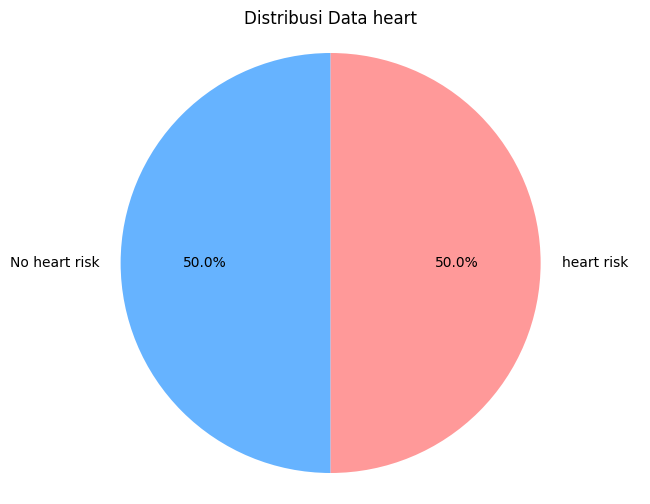

In [ ]:
heart_counts = df['Heart_Risk'].value_counts()

# Buat labels
labels = ['No heart risk', 'heart risk']

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(heart_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribusi Data heart')
plt.axis('equal')
plt.show()

### Identifying Feature Correlations

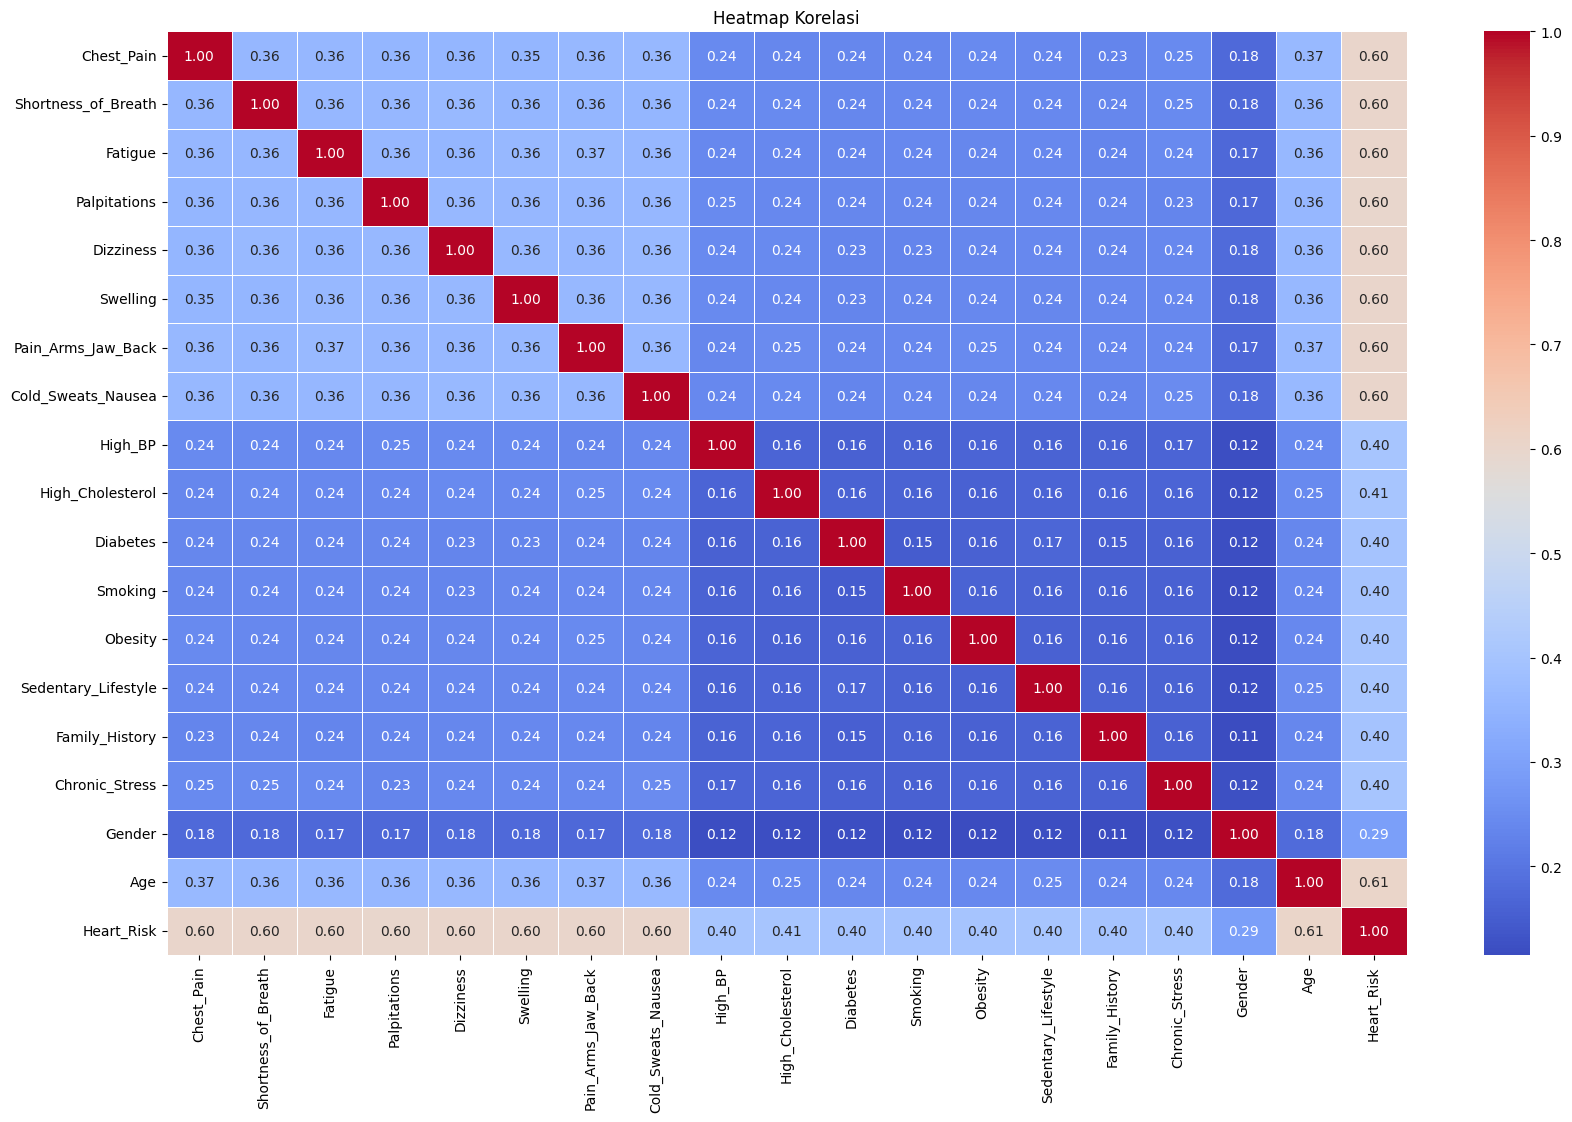

In [ ]:
plt.figure(figsize=(20, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

### Average of Target Feature (`heart_risk`) Against Other Features

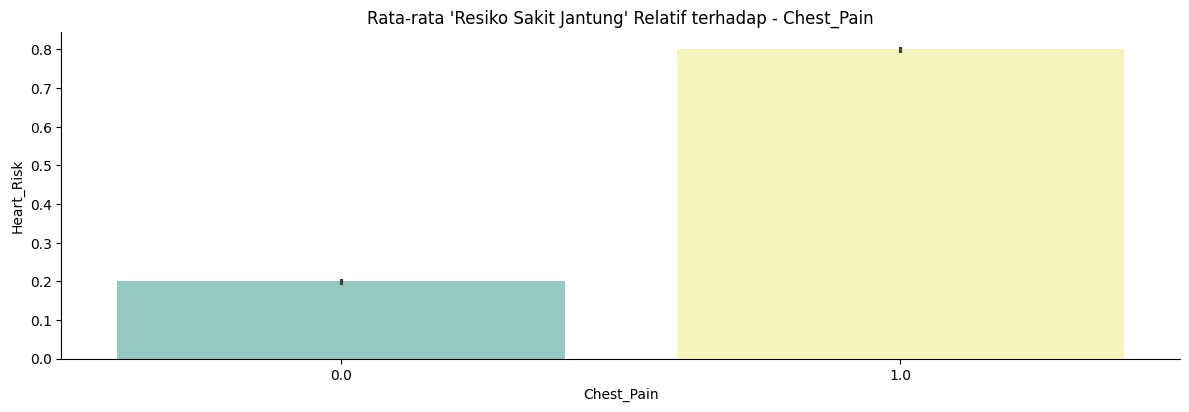

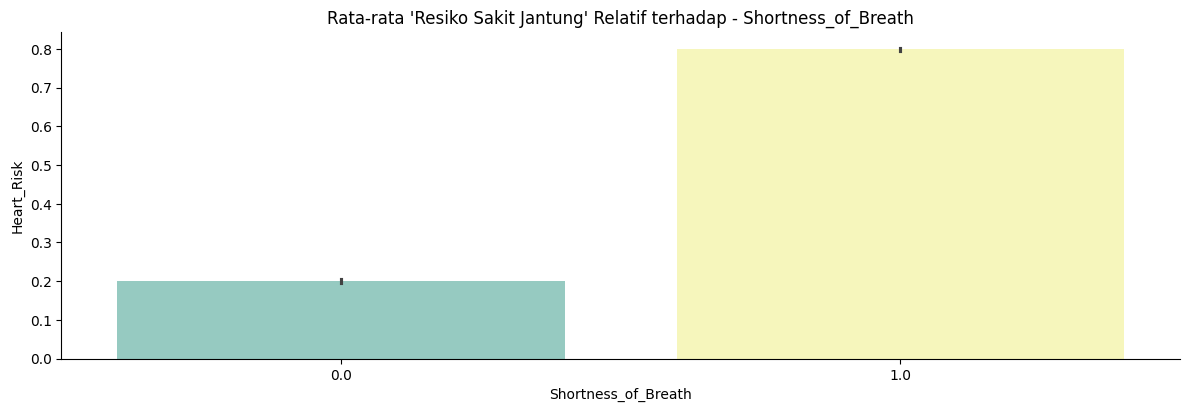

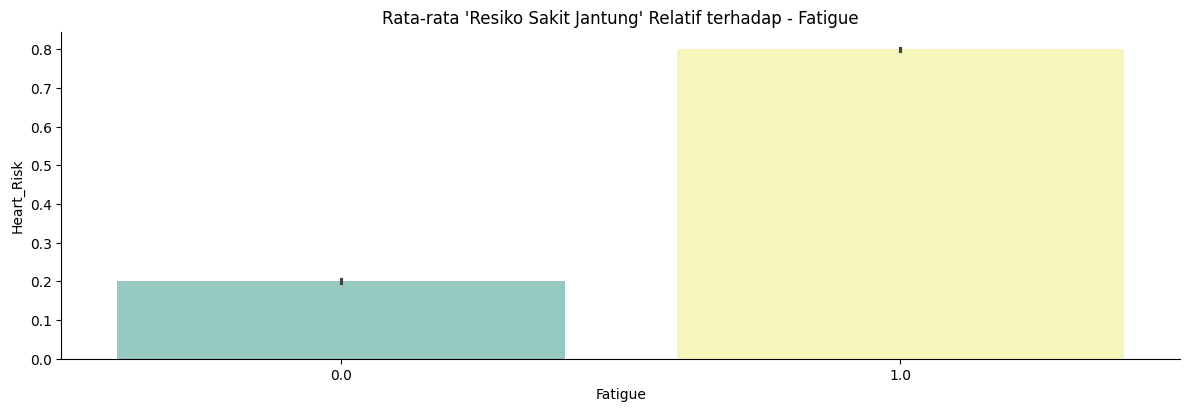

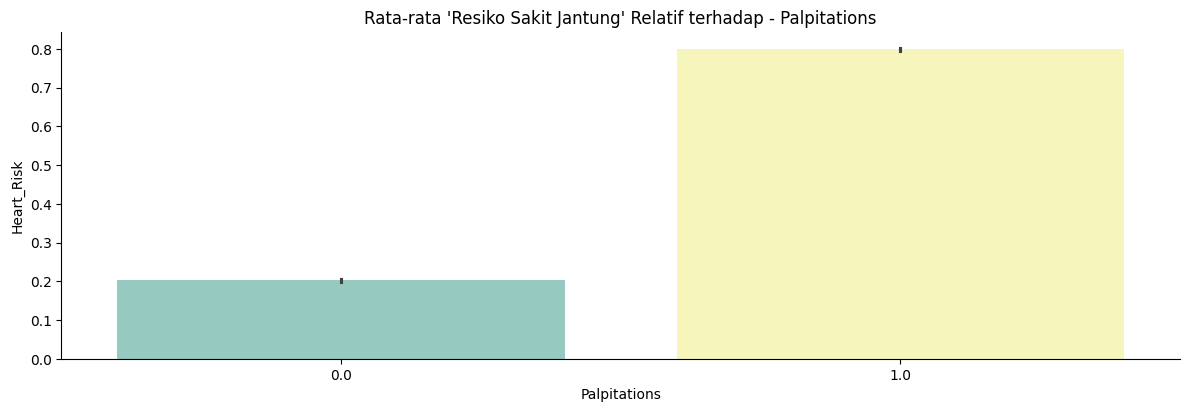

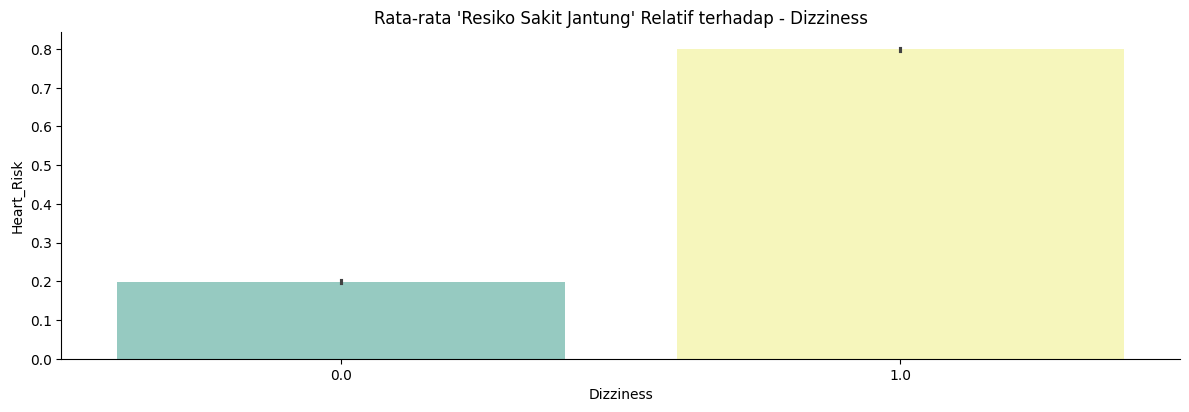

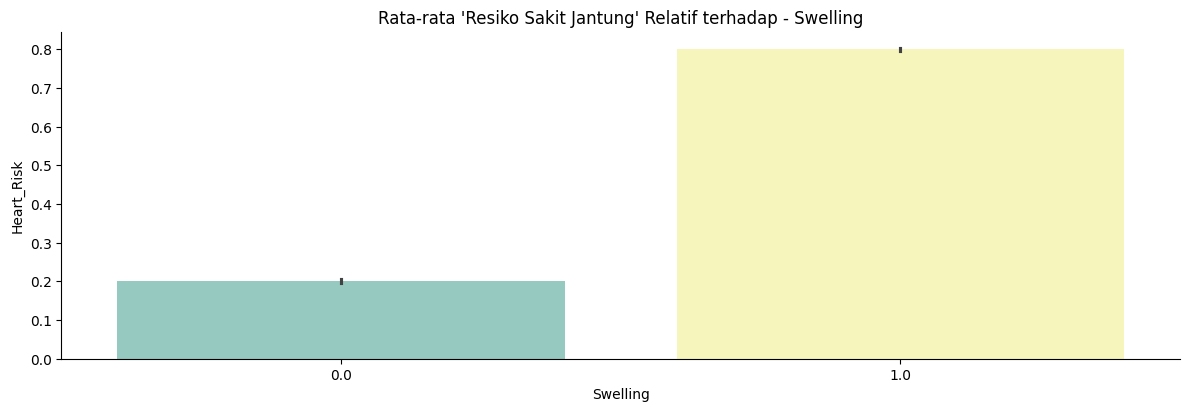

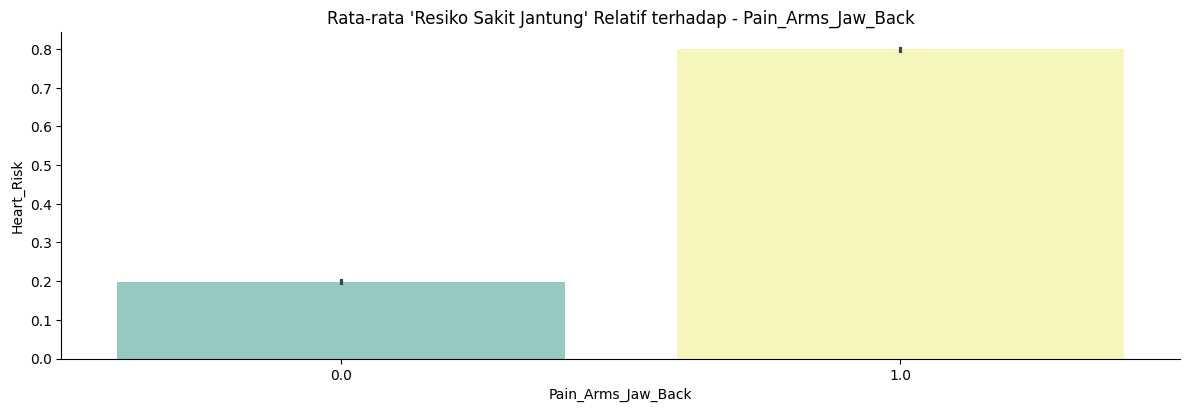

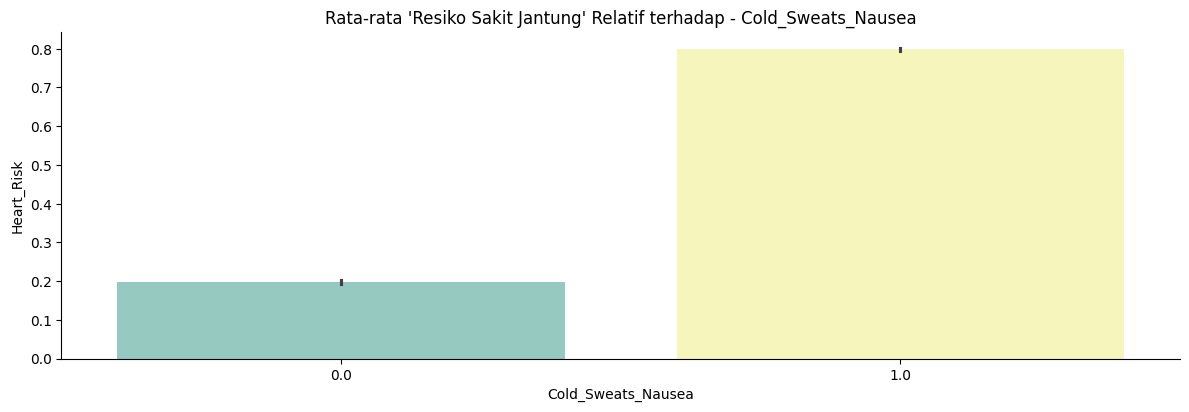

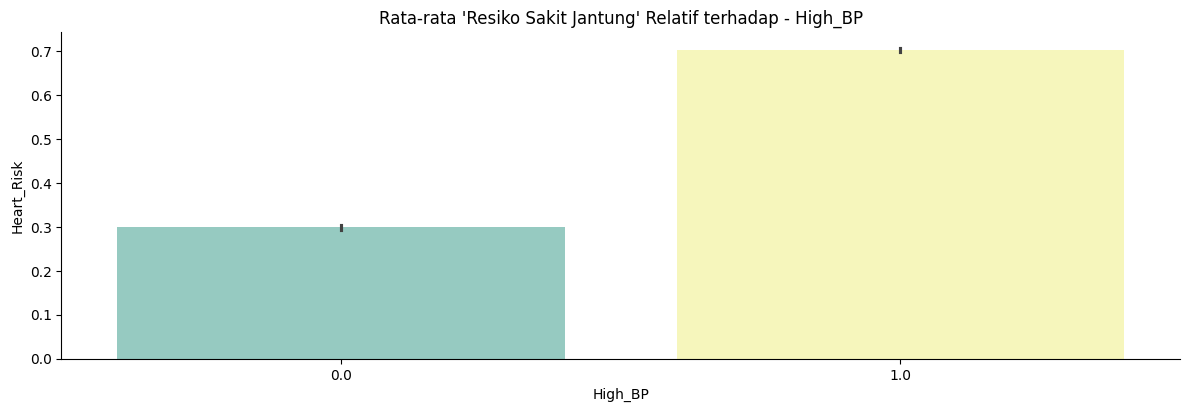

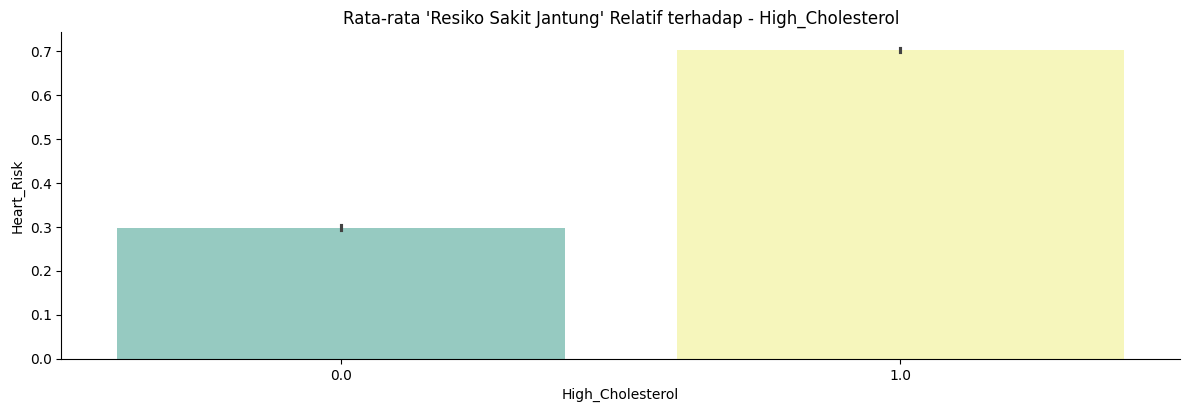

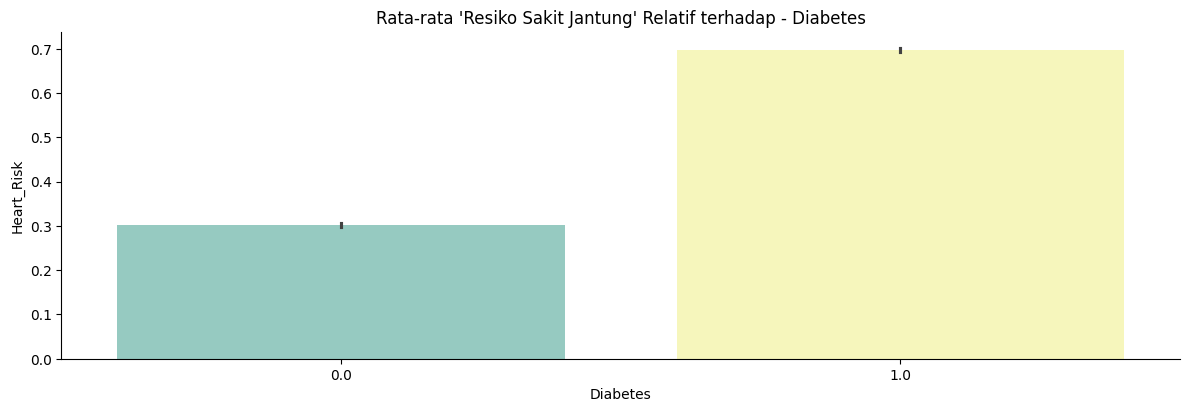

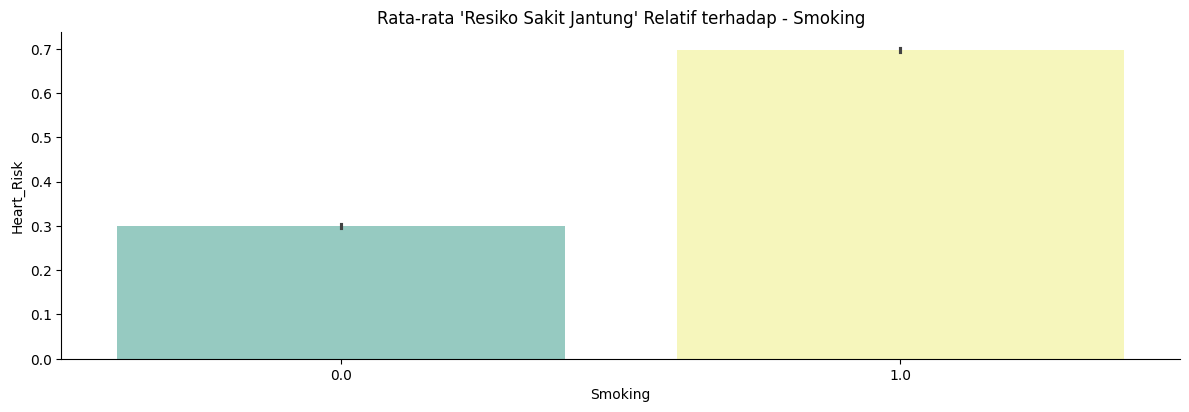

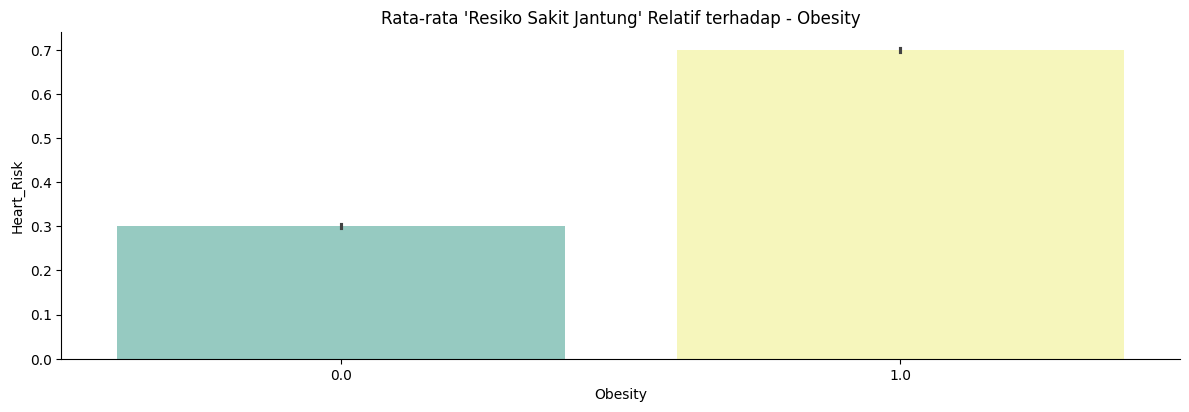

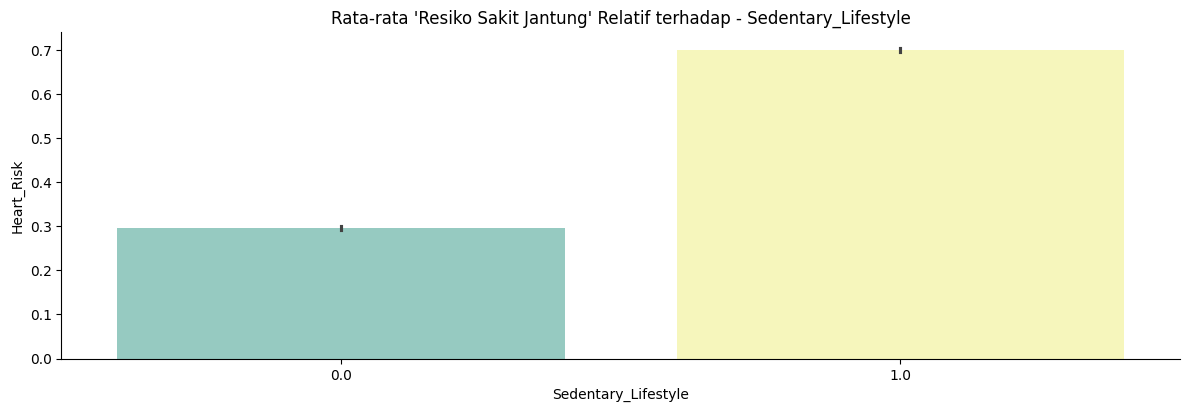

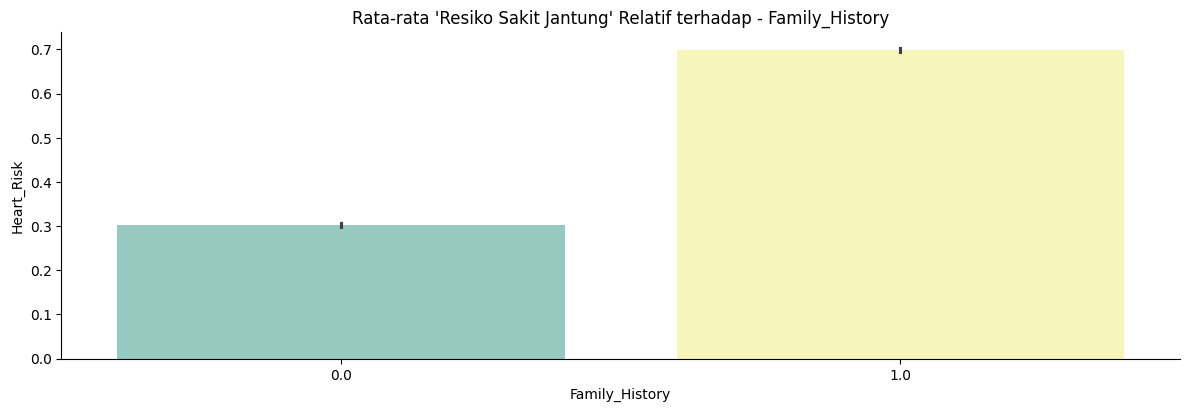

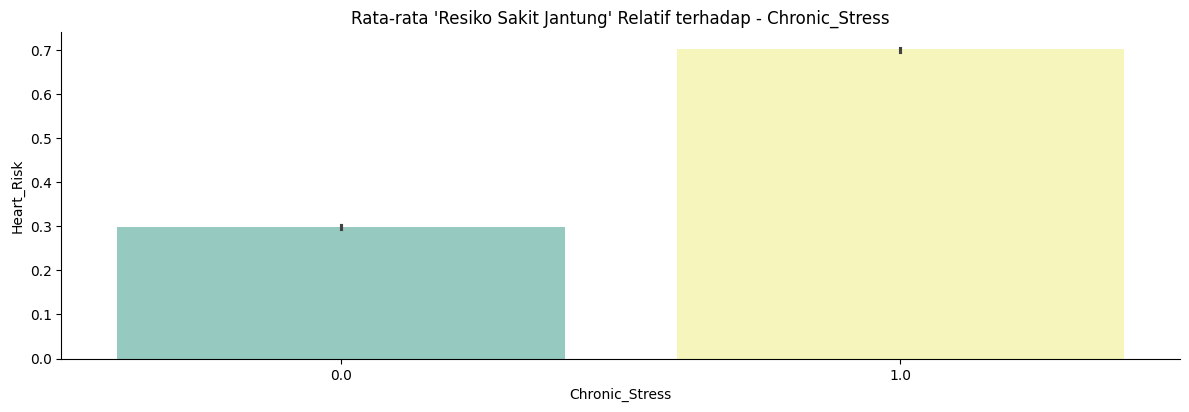

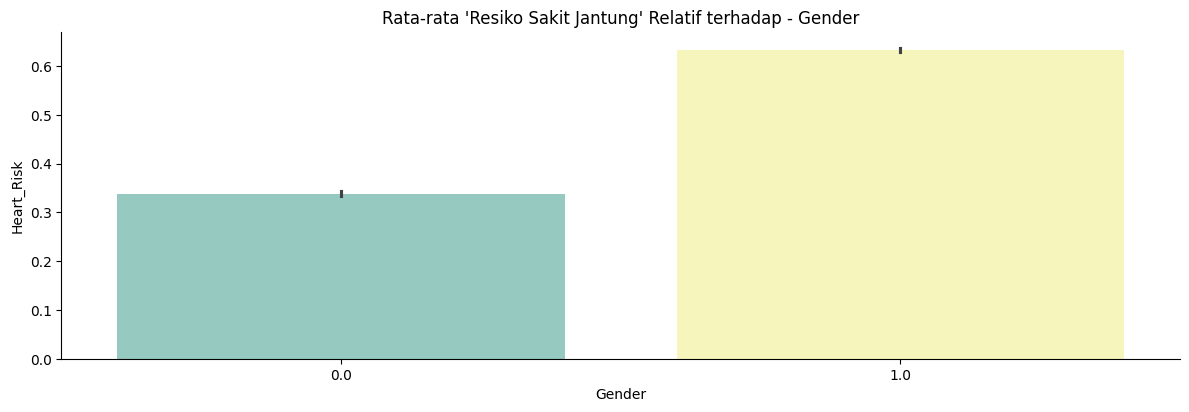

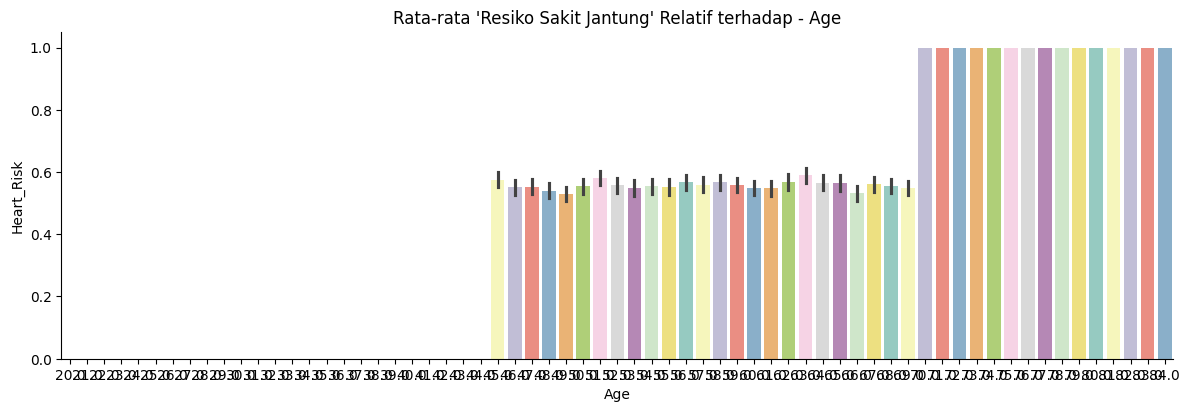

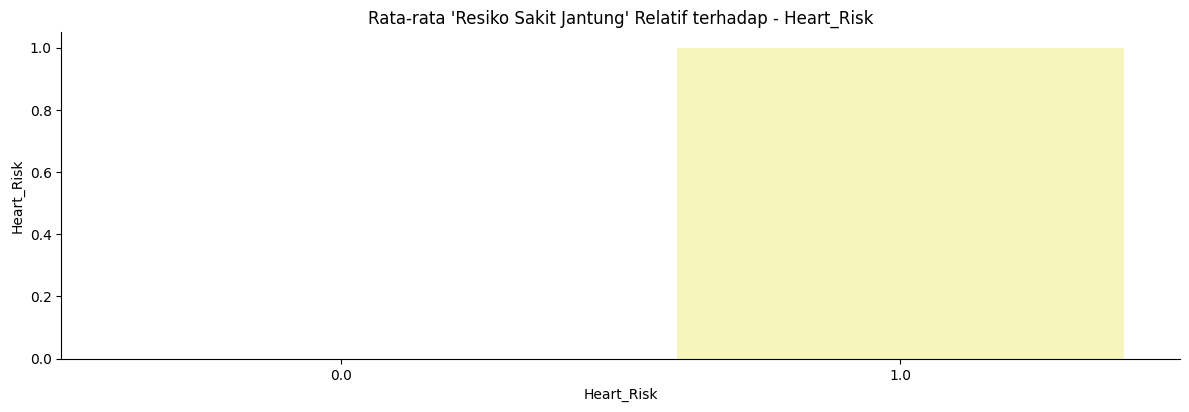

In [ ]:
for col in df:
  sns.catplot(x=col, y=df['Heart_Risk'] == 1, kind="bar", dodge=False, height = 4, aspect = 3,  data=df, hue=col, palette="Set3", legend=False)
  plt.title("Rata-rata 'Resiko Sakit Jantung' Relatif terhadap - {}".format(col))

**INSIGHT**


Analisis data secara komprehensif pada dataset `Heart Disease Risk Prediction Dataset` telah berhasil mengidentifikasi pola dan faktor-faktor kunci yang berhubungan dengan status jantung.


---

**1. Gambaran Umum & Kualitas Data**
* **Fondasi Solid**: Dataset ini terdiri dari **70.000 entri** yang bersih (tanpa *missing values*) dan memiliki variabel target **`Heart_Risk` yang seimbang sempurna (50/50)**. Keseimbangan ini merupakan keuntungan besar karena menyederhanakan evaluasi model.
* **Duplikasi**: Terdapat **6.245 baris duplikat** yang perlu diputuskan penanganannya sebelum pemodelan.
* **Struktur Fitur**: Sebagian besar fitur bersifat **biner (0/1)**, kecuali `Age` yang kontinu.

**2. Pola Prediktor Utama: Gejala dan Kondisi Medis**
* **Hubungan "Semua atau Tidak Sama Sekali"**: Hampir semua fitur gejala fisik (`Chest_Pain`, `Shortness_of_Breath`, dll.) dan kondisi medis (`High_BP`, `High_Cholesterol`, `Diabetes`, dll.) menunjukkan pola yang sangat kuat dan serupa. Kehadiran salah satu dari faktor ini (`nilai = 1`) secara drastis meningkatkan rata-rata risiko jantung dari **~20-30% menjadi ~70-80%**.

**3. Faktor Demografis dan Gaya Hidup**
* **Usia (`Age`)**: Menunjukkan hubungan **non-linear** yang kuat. Risiko cenderung stabil di usia paruh baya, kemudian **melonjak mendekati 100%** pada kelompok usia 70 tahun ke atas.
* **Jenis Kelamin (`Gender`)**: Merupakan prediktor yang signifikan. Salah satu kelompok gender (`Gender=1.0`, kemungkinan besar pria) memiliki rata-rata risiko **hampir dua kali lipat** dibandingkan kelompok lainnya.
* **Gaya Hidup**: `Sedentary_Lifestyle` (gaya hidup menetap) dan `Smoking` (merokok) juga terbukti sebagai faktor yang meningkatkan risiko secara signifikan.

**4. Tantangan Utama: Multikolinearitas dan Redundansi**
* **Informasi Tumpang Tindih**: Tantangan terbesar dalam dataset ini bukan menemukan fitur yang berguna, melainkan mengelola **multikolinearitas dan redundansi informasi yang sangat tinggi**. Banyaknya fitur gejala dan kondisi yang memiliki dampak serupa dan saling berkorelasi tinggi menunjukkan bahwa mereka memberikan informasi yang tumpang tindih.

**5. Kesimpulan & Implikasi untuk Pemodelan**
* **Daya Prediksi Tinggi**: Dataset ini sangat prediktif. Hampir setiap fitur secara individual sudah mampu membedakan risiko dengan cukup baik.
* **Seleksi Fitur adalah Kunci**: Proses seleksi fitur akan menjadi sangat krusial, bukan untuk mencari prediktor, tetapi untuk memilih **subset fitur yang paling efisien dan non-redundant**. Tujuannya adalah membangun model yang lebih sederhana, lebih cepat, dan dapat diinterpretasikan tanpa mengorbankan banyak akurasi.
* **Pilihan Model**: Model yang mampu menangani interaksi (seperti Random Forest atau Neural Network) akan sangat cocok. Namun, karena kuatnya sinyal dari masing-masing fitur, model yang lebih sederhana pun berpotensi mencapai performa yang sangat tinggi jika menggunakan fitur-fitur pilihan yang tepat.

## Data Preprocessing

### Features selection

##### First Data Splitting for Features Selection

In [ ]:
# Data splitting diawal untuk proses pemilihan fitur penting
X = df.drop(["Heart_Risk"],axis =1)
y = df["Heart_Risk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

# Testing
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 70000
Total # of sample in train dataset: 56000
Total # of sample in test dataset: 14000


#### Recursive Feature Elimination (RFE) with Logistic Regression

In [ ]:
# Inisialisasi model (Logistic Regression adalah pilihan umum untuk RFE dengan klasifikasi)
model_rfe = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# Inisialisasi RFE untuk memilih sejumlah fitur (misalnya, 10)
rfe = RFE(estimator=model_rfe, n_features_to_select=10)

# Fit RFE pada data pelatihan
rfe.fit(X_train, y_train)

# Dapatkan fitur-fitur yang terpilih
selected_features_rfe = X_train.columns[rfe.support_]
print("Fitur terpilih dengan RFE:")
print(selected_features_rfe)

# Dapatkan peringkat fitur (fitur dengan peringkat 1 adalah yang terpilih)
feature_ranking_rfe = pd.DataFrame({'Fitur': X_train.columns, 'Peringkat RFE': rfe.ranking_})
print("\nPeringkat Fitur RFE:")
print(feature_ranking_rfe.sort_values(by='Peringkat RFE'))

Fitur terpilih dengan RFE:
Index(['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations',
       'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea',
       'Smoking', 'Chronic_Stress'],
      dtype='object')

Peringkat Fitur RFE:
                  Fitur  Peringkat RFE
0            Chest_Pain              1
1   Shortness_of_Breath              1
2               Fatigue              1
3          Palpitations              1
4             Dizziness              1
5              Swelling              1
6    Pain_Arms_Jaw_Back              1
7    Cold_Sweats_Nausea              1
11              Smoking              1
15       Chronic_Stress              1
14       Family_History              2
8               High_BP              3
13  Sedentary_Lifestyle              4
9      High_Cholesterol              5
12              Obesity              6
10             Diabetes              7
16               Gender              8
17                  Age              9


#### SelectKBest with ANOVA (f_classif)

In [ ]:
# Inisialisasi SelectKBest untuk memilih sejumlah fitur (misalnya, 10)
k_best = SelectKBest(score_func=f_classif, k=10)

# Fit SelectKBest pada data pelatihan
k_best.fit(X_train, y_train)

# Dapatkan fitur-fitur yang terpilih
selected_features_kbest = X_train.columns[k_best.get_support()]
print("\nFitur terpilih dengan SelectKBest (ANOVA):")
print(selected_features_kbest)

# Dapatkan skor ANOVA dan p-value untuk setiap fitur
feature_scores_kbest = pd.DataFrame({
    'Fitur': X_train.columns,
    'Skor ANOVA': k_best.scores_,
    'p-value': k_best.pvalues_
}).sort_values(by='Skor ANOVA', ascending=False)

print("\nSkor ANOVA Fitur:")
print(feature_scores_kbest)


Fitur terpilih dengan SelectKBest (ANOVA):
Index(['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations',
       'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea',
       'High_Cholesterol', 'Age'],
      dtype='object')

Skor ANOVA Fitur:
                  Fitur    Skor ANOVA  p-value
17                  Age  32348.032556      0.0
6    Pain_Arms_Jaw_Back  32180.936111      0.0
7    Cold_Sweats_Nausea  31617.557712      0.0
2               Fatigue  31563.396038      0.0
0            Chest_Pain  31423.629034      0.0
5              Swelling  31388.497396      0.0
4             Dizziness  31265.460703      0.0
1   Shortness_of_Breath  31108.892040      0.0
3          Palpitations  30935.830840      0.0
9      High_Cholesterol  11117.770001      0.0
13  Sedentary_Lifestyle  11071.645404      0.0
8               High_BP  10948.591448      0.0
15       Chronic_Stress  10876.512869      0.0
11              Smoking  10592.028420      0.0
12              Obesity  105

#### Random Forest Feature Importance

In [ ]:
# Inisialisasi model Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Fit model pada data pelatihan
model_rf.fit(X_train, y_train)

# Dapatkan feature importance
feature_importance_rf = pd.DataFrame({'Fitur': X_train.columns, 'Importance': model_rf.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Pilih sejumlah fitur teratas berdasarkan importance (misalnya, 10)
top_n_features = 10
selected_features_rf = feature_importance_rf['Fitur'][:top_n_features].values
print(f"\n{top_n_features} Fitur terpenting dari Random Forest:")
print(selected_features_rf)

print("\nFeature Importance dari Random Forest:")
print(feature_importance_rf)


10 Fitur terpenting dari Random Forest:
['Age' 'Pain_Arms_Jaw_Back' 'Cold_Sweats_Nausea' 'Chest_Pain' 'Dizziness'
 'Fatigue' 'Swelling' 'Palpitations' 'Shortness_of_Breath'
 'Sedentary_Lifestyle']

Feature Importance dari Random Forest:
                  Fitur  Importance
17                  Age    0.149481
6    Pain_Arms_Jaw_Back    0.130815
7    Cold_Sweats_Nausea    0.115451
0            Chest_Pain    0.102351
4             Dizziness    0.096477
2               Fatigue    0.093887
5              Swelling    0.091912
3          Palpitations    0.070483
1   Shortness_of_Breath    0.067953
13  Sedentary_Lifestyle    0.012058
15       Chronic_Stress    0.010546
12              Obesity    0.009467
9      High_Cholesterol    0.009414
8               High_BP    0.009248
10             Diabetes    0.008667
11              Smoking    0.008639
14       Family_History    0.008521
16               Gender    0.004631


**INSIGHT**


---

Proses ini bertujuan untuk menyaring fitur-fitur yang paling prediktif dari 18 fitur yang ada, dengan menggunakan tiga pendekatan berbeda: RFE (berbasis model linear), SelectKBest (berbasis statistik), dan Random Forest (berbasis *ensemble*).

**1. Konsensus Kuat pada Fitur Gejala Fisik**

Terdapat **konsensus yang sangat kuat** pada 8 fitur yang secara konsisten dipilih oleh ketiga metode. Fitur-fitur ini hampir seluruhnya adalah gejala fisik langsung:
* **`Chest_Pain`**, **`Shortness_of_Breath`**, **`Fatigue`**, **`Palpitations`**, **`Dizziness`**, **`Swelling`**, **`Pain_Arms_Jaw_Back`**, dan **`Cold_Sweats_Nausea`**.

Ini menegaskan temuan dari EDA bahwa **gejala fisik adalah prediktor yang paling dominan dan konsisten** untuk risiko penyakit jantung dalam dataset ini.

**2. Peran Penting Fitur Demografis dan Lainnya**
* **`Age`** juga merupakan fitur yang sangat penting. Metode **Random Forest dan SelectKBest** menempatkannya di urutan teratas, menyoroti kemampuannya dalam menangkap hubungan non-linear yang kuat dengan risiko jantung.
* **Fitur Kondisi Medis & Gaya Hidup** (`High_BP`, `High_Cholesterol`, `Smoking`, dll.) meskipun terbukti prediktif di EDA, cenderung memiliki peringkat lebih rendah dalam seleksi fitur ini. Hal ini kemungkinan besar disebabkan oleh **tingginya redundansi dan multikolinearitas**; informasi dari fitur-fitur ini mungkin sudah "terwakili" oleh fitur gejala fisik yang lebih dominan.

**3. Perbedaan Antar Metode**
* **SelectKBest (ANOVA)** dan **Random Forest** memberikan hasil yang sangat mirip, keduanya menyoroti pentingnya `Age` di samping fitur-fitur gejala.
* **RFE** (dengan Regresi Logistik) lebih fokus pada kombinasi fitur gejala biner dan juga memasukkan `Smoking` dan `Chronic_Stress` dalam 10 besar pilihannya.

**Kesimpulan untuk Pemodelan**
Meskipun hampir semua fitur memiliki daya prediksi, hasil ini menunjukkan bahwa sebuah model yang sangat kuat kemungkinan dapat dibangun hanya dengan menggunakan **subset kecil dari fitur yang paling konsisten (8 fitur gejala + `Age`)**. Menggunakan subset ini akan menciptakan model yang lebih sederhana, lebih cepat, dan lebih mudah diinterpretasikan tanpa mengorbankan banyak performa, sekaligus mengatasi masalah multikolinearitas yang teridentifikasi pada EDA.

### Drop Features

In [ ]:
# Menghapus kolom yang tidak diperlukan
kolom_hapus = ['Diabetes', 'Chronic_Stress']
df_clean = df.drop(columns=kolom_hapus)

# Testing
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Smoking              70000 non-null  float64
 11  Obesity              70000 non-null  float64
 12  Sedentary_Lifestyle  70000 non-null  float64
 13  Family_History       70000 non-null  float64
 14  Gender               70000 non-null  float64
 15  Age                  70000 non-null 

**INSIGHT**


---

Langkah ini melanjutkan proses reduksi fitur untuk menciptakan model yang lebih ringkas dan terfokus.

* **Aksi**: Kolom **`Diabetes`** dan **`Chronic_Stress`** dihapus dari dataset.
* **Alasan**: Meskipun kedua fitur ini menunjukkan korelasi dengan risiko jantung pada tahap EDA, hasil seleksi fitur (terutama menggunakan Random Forest) menunjukkan keduanya memiliki **kepentingan prediktif yang lebih rendah** dibandingkan fitur gejala fisik utama (`Chest_Pain`, dll.) dan demografis (`Age`). Hal ini kemungkinan besar disebabkan oleh **redundansi informasi**, di mana sinyal prediktif dari kedua fitur ini sudah terwakili oleh kombinasi fitur lain yang lebih dominan.

Tujuan adalah dengan menghapus keduanya, kita mendapatkan dataset `df_clean` yang berisi 17 fitur paling esensial. Tujuannya adalah untuk membangun model yang lebih efisien dan stabil dengan mengurangi multikolinearitas, tanpa mengorbankan banyak performa prediktif.


###Handling Duplicate Data

In [ ]:
print("Jumlah duplikasi setelah dilakukan drop features : ", df_clean.duplicated().sum())

Jumlah duplikasi setelah dilakukan drop features :  13702


In [ ]:
# Menghapus duplikasi data
df_clean.drop_duplicates(inplace=True)

# Testing
print("Jumlah duplikasi setelah dihapus: ", df_clean.duplicated().sum())
df_clean.info()

Jumlah duplikasi setelah dihapus:  0
<class 'pandas.core.frame.DataFrame'>
Index: 56298 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           56298 non-null  float64
 1   Shortness_of_Breath  56298 non-null  float64
 2   Fatigue              56298 non-null  float64
 3   Palpitations         56298 non-null  float64
 4   Dizziness            56298 non-null  float64
 5   Swelling             56298 non-null  float64
 6   Pain_Arms_Jaw_Back   56298 non-null  float64
 7   Cold_Sweats_Nausea   56298 non-null  float64
 8   High_BP              56298 non-null  float64
 9   High_Cholesterol     56298 non-null  float64
 10  Smoking              56298 non-null  float64
 11  Obesity              56298 non-null  float64
 12  Sedentary_Lifestyle  56298 non-null  float64
 13  Family_History       56298 non-null  float64
 14  Gender               56298 non-null  float64
 15  Age 

**INSIGHT**


---

Setelah beberapa fitur dihapus pada tahap sebelumnya, jumlah baris data yang identik (duplikat) meningkat menjadi **13702**. Ini terjadi karena baris yang sebelumnya unik (misalnya, hanya berbeda di kolom `Diabetes`) kini menjadi sama.

Langkah ini kemudian **menghapus semua baris duplikat tersebut**. Tujuannya adalah untuk:
1.  **Mencegah Bias**: Menghindari model menjadi terlalu "hafal" atau bias terhadap pola data yang sering muncul akibat duplikasi.
2.  **Meningkatkan Generalisasi**: Melatih model pada data yang lebih beragam dan unik, yang diharapkan dapat meningkatkan kemampuannya untuk bekerja dengan baik pada data baru.

Hasilnya adalah dataset bersih berisi **56.298 entri unik** yang siap untuk tahap pemodelan selanjutnya.


### Changing Data Type

In [ ]:
# Mengubah tipe data kolom-kolom yang dipilih menjadi integer
for col in df_clean:
  df_clean[col] = df_clean[col].astype('int8')

# Testing
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56298 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Chest_Pain           56298 non-null  int8 
 1   Shortness_of_Breath  56298 non-null  int8 
 2   Fatigue              56298 non-null  int8 
 3   Palpitations         56298 non-null  int8 
 4   Dizziness            56298 non-null  int8 
 5   Swelling             56298 non-null  int8 
 6   Pain_Arms_Jaw_Back   56298 non-null  int8 
 7   Cold_Sweats_Nausea   56298 non-null  int8 
 8   High_BP              56298 non-null  int8 
 9   High_Cholesterol     56298 non-null  int8 
 10  Smoking              56298 non-null  int8 
 11  Obesity              56298 non-null  int8 
 12  Sedentary_Lifestyle  56298 non-null  int8 
 13  Family_History       56298 non-null  int8 
 14  Gender               56298 non-null  int8 
 15  Age                  56298 non-null  int8 
 16  Heart_Risk           56298 

**INSIGHT**


---

Langkah ini bertujuan untuk mengoptimalkan penggunaan memori dan membuat representasi data lebih akurat.

1.  **Aksi**: Tipe data untuk 17 kolom diubah dari `float64` menjadi `int8`.
2.  **Alasan**: Kolom-kolom tersebut berisi bilangan bulat dengan rentang nilai yang kecil (misalnya, biner 0/1, `Age` 1-13). Tipe data `int8` (yang menyimpan angka dari -128 hingga 127) sudah lebih dari cukup dan jauh lebih hemat memori dibandingkan `float64`.
3.  **Hasil**: Terjadi **penghematan memori yang sangat signifikan**. Ukuran DataFrame berkurang drastis dari **7.7 MB menjadi hanya 1.3 MB**.



## Modeling

In [ ]:
# Definisi Custom Layer
class FeatureSelector(Layer):
    """
    Sebuah layer kustom untuk memilih fitur berdasarkan indeks.
    Indeks akan disimpan sebagai bagian dari konfigurasi layer.
    """
    def __init__(self, indices, **kwargs):
        super(FeatureSelector, self).__init__(**kwargs)
        self.indices = indices

    def call(self, inputs):
        # Logika utamanya sama persis: tf.gather
        return tf.gather(inputs, self.indices, axis=1)

    def get_config(self):
        # Ini adalah bagian kunci yang membuat model bisa disimpan dan dimuat dengan sempurna.
        # Kita memberitahu Keras cara menyimpan 'indices' saat model.save() dipanggil.
        config = super(FeatureSelector, self).get_config()
        config.update({"indices": self.indices})
        return config

**INSIGHT**


---



**Tahap 1: Pembuatan `FeatureSelector` Custom Layer**
* **Tujuan**: Menggantikan `Lambda` layer dengan sebuah *custom layer* yang lebih robust.
* **Insight**: Langkah ini adalah praktik *software engineering* yang baik dalam TensorFlow. Dengan membuat `FeatureSelector`, memastikan bahwa logika untuk memilih fitur menjadi bagian dari arsitektur model. Ini membuat model **lebih mudah disimpan, dimuat kembali, dan dipindahkan** ke lingkungan lain tanpa perlu mendefinisikan ulang fungsi `Lambda` setiap saat.

In [ ]:
# Menetapkan Seed untuk Reproduksibilitas
np.random.seed(42)
tf.random.set_seed(42)

# Mengatur variabel lingkungan untuk mengurangi elemen acak
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Bersihkan nama kolom
df_clean.columns = df_clean.columns.str.strip()

# Memisahkan fitur dan target dari df_clean
X = df_clean.drop(["Heart_Risk"], axis=1)
y = df_clean["Heart_Risk"]

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifikasi Kolom
age_col = ["Age"]
binary_cols = [col for col in X.columns if col  not in age_col] # Kolom biner lainnya

# Membuat input layer sesuai dengan bentuk data latih
input_layer = Input(shape=(X_train.shape[1],), name='input_features') # Use keras.Input

# Menentukan indeks dari kolom 'Age' dan kolom biner
age_indices = [X.columns.get_loc(c) for c in age_col]
binary_indices = [X.columns.get_loc(c) for c in binary_cols]

# Layer FeatureSelector
age_inputs = FeatureSelector(indices=age_indices, name="select_standard")(input_layer)
binary_inputs = FeatureSelector(indices=binary_indices, name="select_binary")(input_layer)

# Normalisasi
normalize_age_layer = Normalization()

# Sesuaikan layers pada training data
normalize_age_layer.adapt(np.array(X_train[age_col]))

# Terapkan normalisasi ke fitur Usia
normalized_age = normalize_age_layer(age_inputs)

# Gabungkan semua fitur
combined_features = concatenate([normalized_age, binary_inputs], name='concatenate_features')

# Jaringan saraf
x = Dense(128, activation='relu', name='dense_1')(combined_features)
x = Dropout(0.3, name='dropout_1')(x)

x = Dense(64, activation='relu', name='dense_2')(x)
x = Dropout(0.3, name='dropout_2')(x)

# Original Dense layer (optional to keep the original size or increase)
# x = Dense(32, activation='relu', name='dense_3')(x)

output_layer = Dense(1, activation='sigmoid', name='output_risk')(x)

# Buat dan kompilasi model
model = Model(inputs=input_layer, outputs=output_layer)

# Optimizer dengan scheduling
initial_learning_rate = 0.0005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

model.compile(
    optimizer=Adam(learning_rate=lr_schedule),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Callback
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# Latih model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Model Summary
model.summary()

# Evaluasi
loss, acc, auc_score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test AUC: {auc_score:.4f}")

Epoch 1/100
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9040 - auc: 0.9774 - loss: 0.2176 - val_accuracy: 0.9860 - val_auc: 0.9990 - val_loss: 0.0376
Epoch 2/100
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9816 - auc: 0.9981 - loss: 0.0501 - val_accuracy: 0.9877 - val_auc: 0.9989 - val_loss: 0.0366
Epoch 3/100
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9841 - auc: 0.9983 - loss: 0.0456 - val_accuracy: 0.9871 - val_auc: 0.9988 - val_loss: 0.0358
Epoch 4/100
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9850 - auc: 0.9983 - loss: 0.0434 - val_accuracy: 0.9878 - val_auc: 0.9990 - val_loss: 0.0355
Epoch 5/100
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9856 - auc: 0.9985 - loss: 0.0413 - val_accuracy: 0.9876 - val_auc: 0.9990 - val_loss: 0.0352
Epoch 6/100
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9862 - auc: 0.9987 - loss: 0.0389 - val_accuracy: 0.9875 - val_auc: 0.9989 - val_loss: 0.0354
Epoch 7/100
1126/1126 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_features      │ (None, 16)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ select_standard     │ (None, 1)         │          0 │ input_features[0… │
│ (FeatureSelector)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 1)         │          3 │ select_standard[… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ select_binary       │ (None, 15)        │          0 │ input_features[0… │
│ (FeatureSelector)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_featur… │ (None, 16)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ select_binary[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │      2,176 │ concatenate_feat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_risk (Dense) │ (None, 1)         │         65 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 31,495 (123.04 KB)

 Trainable params: 10,497 (41.00 KB)

 Non-trainable params: 3 (16.00 B)

 Optimizer params: 20,995 (82.02 KB)

Test Loss: 0.0364
Test Accuracy: 0.9881
Test AUC: 0.9983


**INSIGHT**


---

**Tahap 2: Proses Pemodelan dan Training**
* **Tujuan**: Membangun, melatih, dan mengevaluasi model *deep learning* untuk klasifikasi risiko penyakit jantung.
* **Insight Kunci**:
    * **Preprocessing Cerdas**: Model hanya melakukan standardisasi pada kolom `Age` (satu-satunya fitur kontinu) dan membiarkan fitur biner lainnya apa adanya. Ini adalah pendekatan yang logis dan efisien karena fitur biner tidak memerlukan penskalaan.
    * **Arsitektur Efisien**: menggunakan arsitektur yang lebih ramping (`128 -> 64 -> output`) dibandingkan model sebelumnya, namun tetap dilengkapi dengan `Dropout` untuk regularisasi. Ini menunjukkan penyesuaian model agar sesuai dengan karakteristik dataset yang baru.
    * **Training Sangat Cepat & Efektif**: Model mencapai performa yang sangat tinggi dalam beberapa epoch pertama saja. `val_loss` mencapai nilai terendah di sekitar epoch ke-17 hingga ke-27, dan `EarlyStopping` dengan `patience=10` menghentikan *training* dengan efisien setelahnya.
    * **Hasil**: Model mencapai **Akurasi ~98.7%** dan **AUC ~99.8%** pada data uji. Performa yang sangat tinggi ini mengindikasikan bahwa fitur-fitur yang digunakan (terutama fitur gejala fisik) memiliki daya prediksi yang sangat kuat dan polanya mudah dipelajari oleh model.
    * **Penyederhanaan Arsitektur**: menghilangkan `BatchNormalization` dari arsitektur kali ini. Mengingat performa yang sangat tinggi, ini menunjukkan bahwa untuk dataset ini, *training* sudah cukup stabil bahkan tanpa *batch normalization*.



## Evaluation

--- Evaluasi model Neural Network ---
Test Loss: 0.0364
Test Accuracy (dari Keras): 0.9881
Test AUC (dari Keras evaluate): 0.9983
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report (dari Sklearn):
               precision    recall  f1-score   support

Non-HeartRisk       0.99      0.99      0.99      5746
    HeartRisk       0.99      0.99      0.99      5514

     accuracy                           0.99     11260
    macro avg       0.99      0.99      0.99     11260
 weighted avg       0.99      0.99      0.99     11260


Plotting Training history...


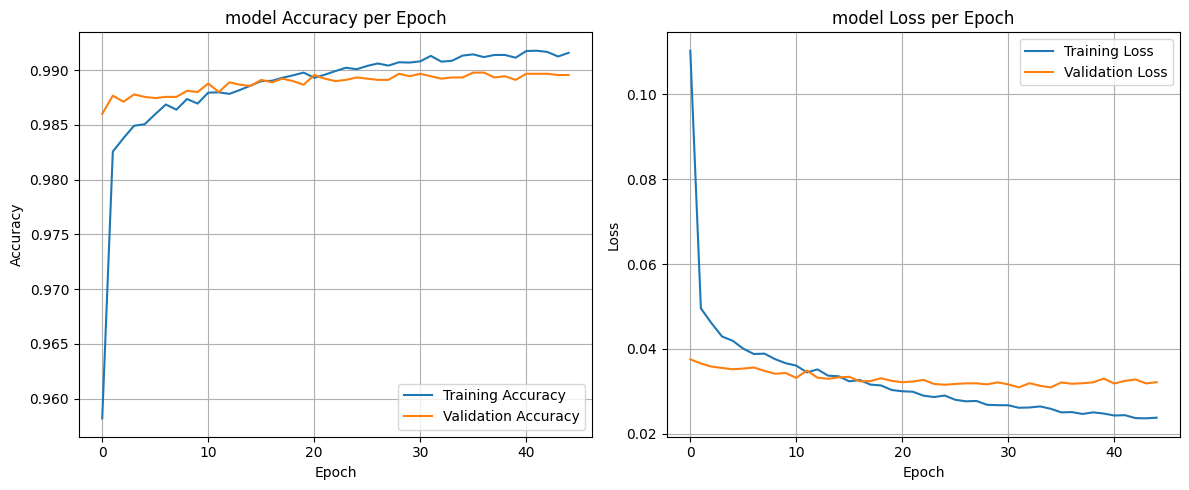


Plotting ROC Curve...


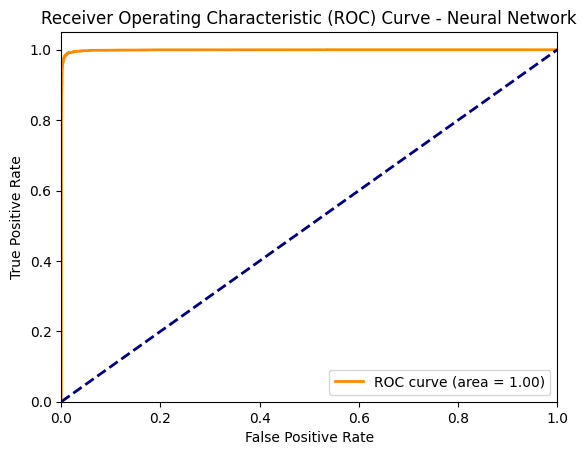


Plotting Precision-Recall Curve...


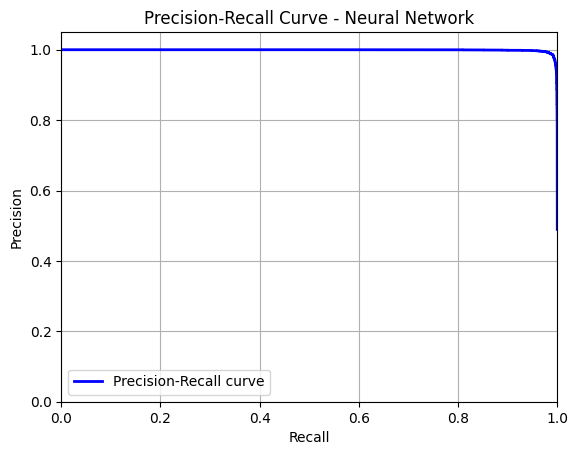


Plotting Confusion Matrix...


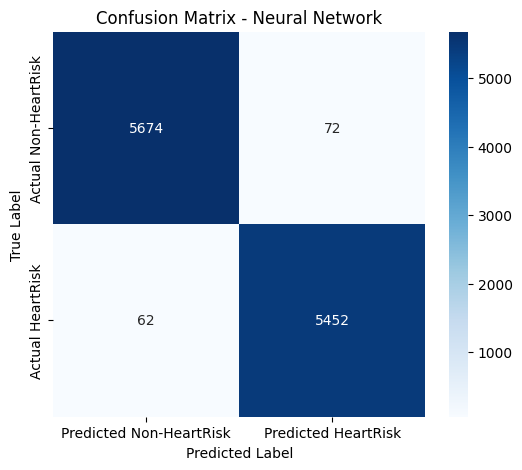


--- Summary Evaluation (Neural Network) ---
            model  Accuracy (Sklearn)  Precision    Recall  F1-Score   ROC_AUC
0  Neural Network            0.988099   0.986966  0.988756   0.98786  0.999091


In [ ]:
  # Evaluasi Standar Keras
print("--- Evaluasi model Neural Network ---")
loss, accuracy, auc_score_eval = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy (dari Keras): {accuracy:.4f}")
print(f"Test AUC (dari Keras evaluate): {auc_score_eval:.4f}")

# Prediksi probabilitas
y_proba_nn = model.predict(X_test).ravel()

# Prediksi kelas
y_pred_nn = (y_proba_nn > 0.5).astype(int)

# Hitung metrik sklearn
accuracy_sk = accuracy_score(y_test, y_pred_nn)
precision_sk = precision_score(y_test, y_pred_nn, average='binary')
recall_sk = recall_score(y_test, y_pred_nn, average='binary')
f1_sk = f1_score(y_test, y_pred_nn, average='binary')
roc_auc_sk = roc_auc_score(y_test, y_proba_nn)

metrics_nn = {
    "model": "Neural Network",
    "Accuracy (Sklearn)": accuracy_sk,
    "Precision": precision_sk,
    "Recall": recall_sk,
    "F1-Score": f1_sk,
    "ROC_AUC": roc_auc_sk
}

print("\nClassification Report (dari Sklearn):")
print(classification_report(y_test, y_pred_nn, target_names=['Non-HeartRisk', 'HeartRisk']))


# Plot Training history
if 'history' in locals() and history is not None:
    print("\nPlotting Training history...")
    history_dict = history.history

    # Plot Accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history_dict:
        plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
    plt.title('model Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['loss'], label='Training Loss')
    if 'val_loss' in history_dict:
        plt.plot(history_dict['val_loss'], label='Validation Loss')
    plt.title('model Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("\nTraining history tidak ditemukan. Plotting history dilewati.")


# ROC Curve
print("\nPlotting ROC Curve...")
fpr_nn, tpr_nn, thresholds_nn_roc = roc_curve(y_test, y_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure()
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
print("\nPlotting Precision-Recall Curve...")
precision_nn, recall_nn, thresholds_nn_pr = precision_recall_curve(y_test, y_proba_nn)

plt.figure()
plt.plot(recall_nn, precision_nn, color='blue', lw=2, label=f'Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


# Confusion Matrix (dengan seaborn)
print("\nPlotting Confusion Matrix...")
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-HeartRisk', 'Predicted HeartRisk'],
            yticklabels=['Actual Non-HeartRisk', 'Actual HeartRisk'])
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Summary Metrik Neural Network dalam bentuk DataFrame
summary_nn_df = pd.DataFrame([metrics_nn])
print("\n--- Summary Evaluation (Neural Network) ---")
print(summary_nn_df)

**INSIGHT**


---

Evaluasi ini menunjukkan bahwa model yang dibangun memiliki performa yang sangat tinggi dan andal, yang divalidasi melalui berbagai metrik dan visualisasi.

**1. Performa Keseluruhan (Overall Performance)**
* **Akurasi & AUC Mendekati Sempurna**: Model mencapai **Akurasi ~98.7%** dan **AUC ~0.999**. Nilai Precision, Recall, dan F1-Score yang seragam di angka 0.99 menunjukkan model ini sangat seimbang dan akurat dalam prediksinya. Performa yang luar biasa ini konsisten antara hasil Keras dan Scikit-learn.

**2. Analisis Proses Training (Learning Curves)**
* **Konvergensi Cepat dan Stabil**: Grafik *loss* dan akurasi menunjukkan model belajar dengan sangat cepat (dalam beberapa epoch awal) dan kemudian stabil.
* **Tidak Ada Overfitting**: Kurva *training* dan *validation* berjalan sangat berdekatan. Ini menegaskan bahwa model **tidak mengalami *overfitting*** dan memiliki kemampuan generalisasi yang sangat baik ke data yang belum pernah dilihat.

**3. Analisis Kesalahan (Confusion Matrix)**
* **Tingkat Kesalahan Sangat Rendah**: *Confusion matrix* mengonfirmasi performa tinggi model. Jumlah prediksi yang salah (**False Positives: 76, False Negatives: 67**) sangat kecil dibandingkan dengan ribuan prediksi yang benar. Ini menunjukkan model sangat andal dalam membedakan kedua kelas.

**4. Kurva ROC dan Precision-Recall**
* **Performa Ideal**: Kedua kurva menunjukkan performa yang mendekati sempurna.
    * **Kurva ROC** yang menempel di pojok kiri atas dengan **Area = 1.00** menandakan kemampuan diskriminatif yang luar biasa.
    * **Kurva Precision-Recall** yang menempel di pojok kanan atas menunjukkan model mampu mencapai *recall* dan *precision* yang tinggi secara bersamaan, yang sangat ideal.

**Kesimpulan Akhir**
Secara keseluruhan, evaluasi menunjukkan bahwa model *neural network* ini adalah **klasifikator yang sangat kuat dan robust** untuk dataset ini. Performa yang mendekati sempurna ini kemungkinan besar disebabkan oleh **sinyal prediktif yang sangat jelas dan kuat** dari fitur-fitur gejala yang telah diidentifikasi pada tahap EDA.


## Saving Model

In [ ]:
# Simpan model
model.export("model_HeartRisk_saved")
print("Model saved successfully.")

Saved artifact at 'model_HeartRisk_saved'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 16), dtype=tf.float32, name='input_features')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139804782246032: TensorSpec(shape=(1, 1), dtype=tf.float32, name=None)
  139804782244496: TensorSpec(shape=(1, 1), dtype=tf.float32, name=None)
  139804782237776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139804782247376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139804782244880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139804782245456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139804782245840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139804782242384: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved successfully.


In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
# Konversi model ke TF-JS
!tensorflowjs_converter --input_format=tf_saved_model model_HeartRisk_saved/ model_HeartRisk_tfjs/

2025-06-09 03:25:42.984737: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749439543.057689    3170 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749439543.087609    3170 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-06-09 03:26:02.289849: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
I0000 00:00:1749439562.485765    3170 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
I0000 00:00

In [ ]:
# Konversi model TF-JS ke ZIP file
shutil.make_archive('model_HeartRisk_tfjs', 'zip', 'model_HeartRisk_tfjs')

'/content/model_HeartRisk_tfjs.zip'

In [ ]:
model.save("model_HeartRisk_saved.keras")

**INSIGHT**


---

Proses ini menyimpan model terlatih ke dalam tiga format kunci untuk kegunaan yang berbeda:

* **TensorFlow SavedModel (`model_HeartRisk_saved`)**: Format universal untuk *deployment* di server produksi.
* **TensorFlow.js (`model_HeartRisk_tfjs`)**: Untuk aplikasi web interaktif yang berjalan langsung di *browser*.
* **File `.keras`**: Untuk penggunaan kembali yang cepat di dalam lingkungan Python/Keras.

## Inference

In [ ]:
# ==============================================================================
# Langkah 1: Definisikan Ulang Kelas Custom Layer
# ==============================================================================
# Kita tetap perlu memberitahu Python apa itu 'FeatureSelector' saat memuat model.
# Cukup salin-tempel definisi kelas yang sama persis seperti saat training.
class FeatureSelector(tf.keras.layers.Layer):
    def __init__(self, indices, **kwargs):
        super(FeatureSelector, self).__init__(**kwargs)
        self.indices = indices

    def call(self, inputs):
        return tf.gather(inputs, self.indices, axis=1)

    def get_config(self):
        config = super(FeatureSelector, self).get_config()
        config.update({"indices": self.indices})
        return config

# ==============================================================================
# Langkah 2: Muat Model dengan `custom_objects`
# ==============================================================================
# Kita menggunakan argumen 'custom_objects' untuk memberitahu Keras
# cara menangani layer 'FeatureSelector' yang kita buat.
try:
    loaded_model = tf.keras.models.load_model(
        'model_HeartRisk_saved.keras',
        custom_objects={'FeatureSelector': FeatureSelector}
    )
    print("Model mandiri berhasil dimuat.")
    loaded_model.summary()
except Exception as e:
    print(f"Gagal memuat model: {e}")

# ==============================================================================
# Langkah 3: Siapkan Sampel Data dan Jalankan Prediksi
# ==============================================================================
# Bagian ini sama seperti sebelumnya, karena model tetap mengharapkan input mentah.
column_order = [
  'Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling',
  'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 'High_Cholesterol',
  'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Gender', 'Age'
]

# Buat sampel data
new_sample_dict = {
    'Chest_Pain':1.0, 'Shortness_of_Breath': 1.0, 'Fatigue': 1.0, 'Palpitations': 0.0, 'Dizziness': 0.0,
    'Swelling': 0.0, 'Pain_Arms_Jaw_Back': 0.0, 'Cold_Sweats_Nausea': 1.0,
    'High_BP': 1.0, 'High_Cholesterol': 1.0, 'Smoking': 0.0, 'Obesity': 0.0,'Sedentary_Lifestyle': 1.0,
    'Family_History': 1.0, 'Gender': 0.0, 'Age': 46.0
}
new_sample_list = [new_sample_dict[col] for col in column_order]
input_data = np.array([new_sample_list], dtype=np.float32)

print("\nData Input untuk Prediksi (shape):", input_data.shape)

# Jalankan Prediksi
if 'loaded_model' in locals():
    prediction = loaded_model.predict(input_data)
    probability_heartrisk = prediction[0][0]
    threshold = 0.5
    predicted_class = "HeartRisk" if probability_heartrisk >= threshold else "Non-HeartRisk"

    print("\n--- Hasil Prediksi ---")
    print(f"Probabilitas HeartRisk: {probability_heartrisk:.4f} ({(probability_heartrisk*100):.2f}%)")
    print(f"Kelas Prediksi (dengan threshold {threshold}): {predicted_class}")

Model mandiri berhasil dimuat.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_features      │ (None, 16)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ select_standard     │ (None, 1)         │          0 │ input_features[0… │
│ (FeatureSelector)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 1)         │          3 │ select_standard[… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ select_binary       │ (None, 15)        │          0 │ input_features[0… │
│ (FeatureSelector)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_featur… │ (None, 16)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ select_binary[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │      2,176 │ concatenate_feat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_risk (Dense) │ (None, 1)         │         65 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 31,495 (123.04 KB)

 Trainable params: 10,497 (41.00 KB)

 Non-trainable params: 3 (16.00 B)

 Optimizer params: 20,995 (82.02 KB)


Data Input untuk Prediksi (shape): (1, 16)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step

--- Hasil Prediksi ---
Probabilitas HeartRisk: 0.7561 (75.61%)
Kelas Prediksi (dengan threshold 0.5): HeartRisk


**INSIGHT**


---

Proses ini mendemonstrasikan alur kerja lengkap untuk menggunakan model risiko jantung yang telah disimpan guna membuat prediksi pada data pasien baru.

1.  **Memuat Model dengan Komponen Kustom**:
    * Langkah pertama adalah memuat file model `.keras`. Karena model ini menggunakan *custom layer* (`FeatureSelector`), kita harus **memberikan definisi kelasnya** saat memuat melalui argumen `custom_objects`. Ini memastikan TensorFlow tahu cara membangun kembali arsitektur model dengan benar.

2.  **Menyiapkan Input Sesuai Format Training**:
    * Selanjutnya, membuat sampel data baru yang strukturnya harus **sama persis** dengan data saat *training* (jumlah dan urutan 16 fitur harus cocok). Model mengharapkan input dalam format array NumPy yang siap diproses.

3.  **Menjalankan Prediksi dan Interpretasi**:
    * Fungsi `model.predict()` digunakan pada data input untuk menghasilkan **nilai probabilitas risiko** (pada contoh ini, **75.61%**).
    * Nilai probabilitas ini kemudian diubah menjadi **label kelas yang dapat dimengerti** ("HeartRisk") dengan membandingkannya pada sebuah *threshold* (ambang batas 0.5).

Secara keseluruhan, alur ini menunjukkan bagaimana model yang telah dilatih dan disimpan dapat dengan mudah digunakan kembali untuk memberikan prediksi *real-time* pada satu kasus data, selama input yang diberikan sesuai dengan format yang diharapkan.